### Notes:
* This exam consists of a Regression problem.  
* The target feature is 'price'.
* Random state should be taken as 42 wherever applicable.

# Metadata

* **Carat**- Carat weight of the cubic zirconia.

* **Cut**- Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good,

* **Color**- Colour of the cubic zirconia.With D being the best and J the worst.

* **Clarity**- cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

* **Depth**- The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

* **Table** - The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

* **Price**- the Price of the cubic zirconia.  [Target]

* **X**- Length of the cubic zirconia in mm.

* **Y**- Width of the cubic zirconia in mm.

* **Z**- Height of the cubic zirconia in mm.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


#Preamble: Load the dataset and examine it.

### Notes:
* This exam consists of a Regression problem.  
* The target feature is 'price'.
* Random state should be taken as 42 wherever applicable.

# Metadata

* **Carat**- Carat weight of the cubic zirconia.

* **Cut**- Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good,

* **Color**- Colour of the cubic zirconia.With D being the best and J the worst.

* **Clarity**- cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

* **Depth**- The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

* **Table** - The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

* **Price**- the Price of the cubic zirconia.  [Target]

* **X**- Length of the cubic zirconia in mm.

* **Y**- Width of the cubic zirconia in mm.

* **Z**- Height of the cubic zirconia in mm.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

import xgboost

from sklearn.model_selection import GridSearchCV

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/MLP Case Study/cubic_zirconia1.csv")

#Q1 What is the Shape of the Datset?

Ans (26967, 10)

In [ ]:
data.shape

(26967, 10)

In [ ]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


##Q2 [Marks = 1] Break the dataset into features(`X`) and label (`y`), where the column `price` goes to `y` and the rest of the columns go to `X`. Enter the list of unique values of label in y? [NAT]
Ans : [0,1] or [1,0]

In [ ]:
X = data.drop(['price'], axis= "columns")   # works on pandas dataframe
y = data['price']
X.shape,y.shape

((26967, 9), (26967,))

## Q.3 [Marks 1] How many total number of features (excluding target variable) are there in the dataset? Price is targert variable. [NAT]

Ans:  9

In [ ]:
print('No of Columns:',X.shape[1]) #-1 is there to exclude target variable

No of Columns: 9


## Q.4 [Marks: 2] What are the unique values of feature `Cut` in the dataset? Give a list with inceasing Alphabetical order of as answer
Ans: ['Fair','Good', 'Ideal', 'Premium', 'Very Good']

In [ ]:
X["cut"].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

## Q.5 [Marks: 1] Which columns have categorical data in feature matrix?
Options:

A) ['cut','color','clarity']

B) ['cut','color', 'price']

C) ['depth',	'table']

D) ['carat'	'cut']

Ans: A

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [ ]:
numCols = list(data.select_dtypes("number").columns)
catCols = list(data.select_dtypes(exclude = "number").columns)

## Q6.[Marks: 4] Which feature pair has the highest positive correlation value.
Options:
A) x Vs Carat

B) y Vs Carat

C) z Vs x

D) table Vs depth

Ans: A

<Axes: >

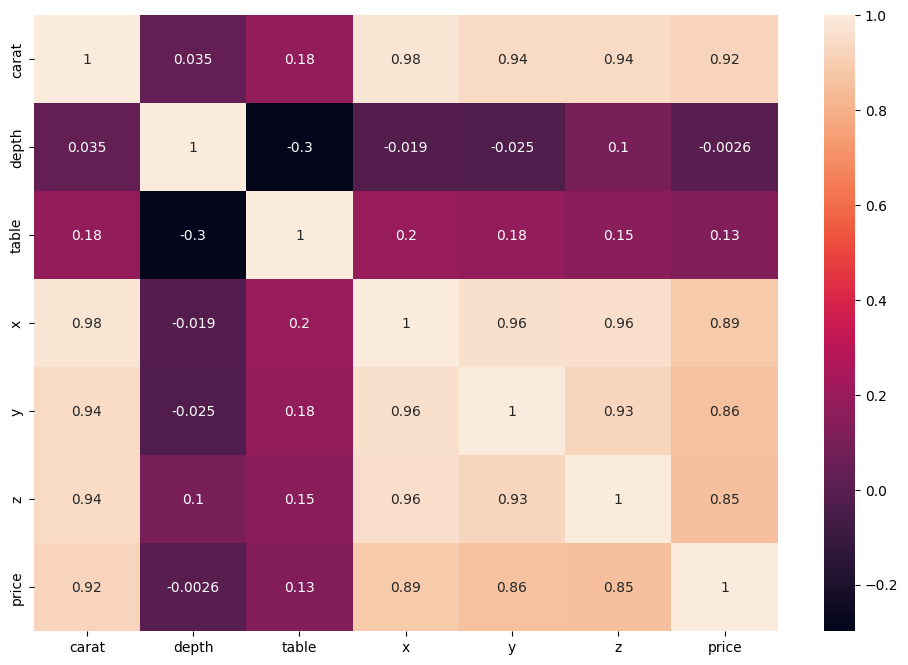

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)  # data.corr() will give a correlation matrix for features containing numerical data

## Q7 [marks: 1] Which of the following features have `missing` values?[MSQ]

Options:

A) cut

B) X

C) depth

D) price


Answer: C)


In [ ]:
X.isnull().sum() #to check null values

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
dtype: int64

# Q8 [Marks : 3] Split the dataset into training and test dataset using `train_test_split` into `70:30` ratio while keeping random_state =42. What is the shape of the training set (X_train) ? [MCQ]

Ans:

A) (18876, 10)

B) (18876, 9)

C) (19876, 9)

D) (8091, 9)

Ans: B

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape,X_test.shape

((18876, 9), (8091, 9))

# Replace missing values as instructed below in each column of data.

##Q9 [Marks2] Compute and write median of the `depth` column of X_train while ignoring the missing values. Replace all NaN values in the depth column of X_train and X_test by the mean computed from the X_train (upto two decimal). [NAT].

Ans:  61.73

In [ ]:
# Using SimpleImputer from sklearn

print("X_train mean: ", np.mean(X_train['depth']))

from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values=np.nan, strategy= 'mean')

X_train['depth'] = si.fit_transform(X_train[['depth']])

X_test['depth'] = si.transform(X_test[['depth']])


X_train mean:  61.73893786048537


In [ ]:
# # using fillna() from pandas

# depth_mean = X_train['depth'].mean()
# print(depth_mean)

# X_train.fillna(value= {"depth": depth_mean},inplace=True)

# X_test.fillna(value= {"depth": depth_mean},inplace=True)

61.73893786048537


In [ ]:
X_train.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [ ]:
X_test.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

# Following questions are on preprocessing:

* Apply OneHotEncoding of pd.get_dummies whichever preferable to you on categorical columns.

* Apply StandardScaler on the numerical columns.

Create the dataset with above preprocessing applied in any way you like


#10[Marks: 2] How many features you will get after preprocessing ?[NAT]

Ans: 26

In [ ]:
enc_X_train= pd.get_dummies(X_train, columns = ['cut','color','clarity'])
enc_X_test= pd.get_dummies(X_test, columns = ['cut','color','clarity'])

In [ ]:
enc_X_train.shape

(18876, 26)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

Transformer = [
    ('scaling', StandardScaler(), X_train.select_dtypes('number').columns)
]

ct = ColumnTransformer(Transformer, remainder='passthrough')


prep_X_train = ct.fit_transform(enc_X_train)

In [ ]:
prep_X_train.shape

(18876, 26)

In [ ]:
prep_X_test = ct.transform(enc_X_test)

#11 [Marks:5] Apply all the following regressor model on processed(encoded and scaled)  training data and answer which regressor is having highest score on processed test data with all the default setting?[NAT]

* DummyRegressor()
* LinearRegression()
* svm (SVR())
* KNN (KNeighborsRegressor())
* DecisionTreeRegressor()
* RandomForestRegressor()
* AdaBoostRegressor()
* GradientBoostingRegressor()
* XGBoostRegressor()


Ans: RandomForestRegressor()

In [ ]:
model = DummyRegressor(strategy='mean')
model.fit(prep_X_train,y_train)
model.score(prep_X_test,y_test)

-0.0003022712540052819

In [ ]:
regressors = [DummyRegressor(),LinearRegression(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),xgboost.XGBRFRegressor()]
regressors

[DummyRegressor(),
 LinearRegression(),
 SVR(),
 KNeighborsRegressor(),
 DecisionTreeRegressor(),
 RandomForestRegressor(),
 AdaBoostRegressor(),
 GradientBoostingRegressor(),
 XGBRFRegressor(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                objective='reg:squarederror', predictor=None, random_state=None,
                reg_alpha=None, ...)]

In [ ]:
for model in regressors:
  model.fit(prep_X_train,y_train)
  print(model,' Score: ', model.score(prep_X_test,y_test))

DummyRegressor()  Score:  -0.0003022712540052819
LinearRegression()  Score:  0.8872757052117065
SVR()  Score:  0.32758061844331965
KNeighborsRegressor()  Score:  0.9486792476266801
DecisionTreeRegressor()  Score:  0.9595252161955716
RandomForestRegressor()  Score:  0.9800811169097875
AdaBoostRegressor()  Score:  0.8848097509240935
GradientBoostingRegressor()  Score:  0.9668168341070638
XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n

##Q12: [Marks 3] Using `SGDRegressor(random_state=42)` as an estimator for exactly 10 iterations set warm_start=True.

Write the correct R2 score on test data  [NAT] (correct Upto 4 digits)

Ans: 0.92

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(random_state=42,max_iter=10,warm_start=True)

sgd.fit(prep_X_train, y_train)

np.round(sgd.score(prep_X_test,y_test),4)

0.9206

# Q13 [MArks:5] Use GridSearchCV for cv=5 to find the best estimator with best params for the given below estimators with parameters ?  

* Use preprocessed training set

1) SGDRegressor(warm_start=True),
  * penalty: ['l2', 'l1', 'elasticnet']
  * alpha : [0.001, 0.01, 0.1, 1]    
  
2) KNeighborsRegressor()
  * n_neighbors : [3,9,13],
  * weights : ['uniform','distance']

3) DecisionTreeRegressor()
  * reg__max_depth : [1,2,3],
  * reg__max_features : [5,6,7]


print the best_estimator and write that estimator only in answer


Ans: KNeighborsRegressor(n_neighbors=9, weights='distance')




In [ ]:
# Create a pipeline
pipe = Pipeline([("reg", SGDRegressor())])  # A default Regressor is required though training won't happen on this

# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [

    {"reg": [SGDRegressor(warm_start=True)],
     "reg__penalty": ['l2', 'l1', 'elasticnet'],
     "reg__alpha" : [0.001, 0.01, 0.1, 1]
     },

     {"reg": [KNeighborsRegressor()],
     "reg__n_neighbors" : [3,9,13],
     'reg__weights' : ['uniform','distance']
     },

    {"reg" : [DecisionTreeRegressor()],
     "reg__max_depth" : [1,2,3],
     "reg__max_features" : [5,6,7]
    }
]

gs = GridSearchCV(pipe, grid_param,cv=5 )

gs

GridSearchCV(cv=5, estimator=Pipeline(steps=[('reg', SGDRegressor())]),
             param_grid=[{'reg': [SGDRegressor(warm_start=True)],
                          'reg__alpha': [0.001, 0.01, 0.1, 1],
                          'reg__penalty': ['l2', 'l1', 'elasticnet']},
                         {'reg': [KNeighborsRegressor()],
                          'reg__n_neighbors': [3, 9, 13],
                          'reg__weights': ['uniform', 'distance']},
                         {'reg': [DecisionTreeRegressor()],
                          'reg__max_depth': [1, 2, 3],
                          'reg__max_features': [5, 6, 7]}])

In [ ]:
gs.fit(prep_X_train,y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('reg', SGDRegressor())]),
             param_grid=[{'reg': [SGDRegressor(warm_start=True)],
                          'reg__alpha': [0.001, 0.01, 0.1, 1],
                          'reg__penalty': ['l2', 'l1', 'elasticnet']},
                         {'reg': [KNeighborsRegressor(n_neighbors=9,
                                                      weights='distance')],
                          'reg__n_neighbors': [3, 9, 13],
                          'reg__weights': ['uniform', 'distance']},
                         {'reg': [DecisionTreeRegressor()],
                          'reg__max_depth': [1, 2, 3],
                          'reg__max_features': [5, 6, 7]}])

In [ ]:
pd.DataFrame(gs.cv_results_).sort_values("mean_test_score", ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg,param_reg__alpha,param_reg__penalty,param_reg__n_neighbors,param_reg__weights,param_reg__max_depth,param_reg__max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,0.006935,0.003788,0.674426,0.295884,"KNeighborsRegressor(n_neighbors=9, weights='di...",NaN,NaN,9,distance,NaN,NaN,"{'reg': KNeighborsRegressor(n_neighbors=9, wei...",0.952000,0.954193,0.950408,0.953130,0.952648,0.952476,0.001258,1
17,0.007975,0.003380,0.591151,0.235976,"KNeighborsRegressor(n_neighbors=9, weights='di...",NaN,NaN,13,distance,NaN,NaN,"{'reg': KNeighborsRegressor(n_neighbors=9, wei...",0.949417,0.951576,0.950448,0.952063,0.951563,0.951014,0.000958,2
13,0.003708,0.000276,0.320677,0.005762,"KNeighborsRegressor(n_neighbors=9, weights='di...",NaN,NaN,3,distance,NaN,NaN,"{'reg': KNeighborsRegressor(n_neighbors=9, wei...",0.950738,0.950873,0.947882,0.950531,0.952601,0.950525,0.001514,3
12,0.004701,0.000086,0.321382,0.006471,"KNeighborsRegressor(n_neighbors=9, weights='di...",NaN,NaN,3,uniform,NaN,NaN,"{'reg': KNeighborsRegressor(n_neighbors=9, wei...",0.946225,0.948748,0.943579,0.947963,0.949822,0.947268,0.002186,4
14,0.003583,0.000099,0.324088,0.003379,"KNeighborsRegressor(n_neighbors=9, weights='di...",NaN,NaN,9,uniform,NaN,NaN,"{'reg': KNeighborsRegressor(n_neighbors=9, wei...",0.945150,0.949252,0.944314,0.947791,0.946488,0.946599,0.001777,5
16,0.012283,0.004834,0.648916,0.209817,"KNeighborsRegressor(n_neighbors=9, weights='di...",NaN,NaN,13,uniform,NaN,NaN,"{'reg': KNeighborsRegressor(n_neighbors=9, wei...",0.941791,0.945179,0.944331,0.945883,0.944534,0.944344,0.001387,6
1,0.205395,0.016362,0.001521,0.000034,SGDRegressor(warm_start=True),0.001,l1,NaN,NaN,NaN,NaN,"{'reg': SGDRegressor(warm_start=True), 'reg__a...",0.910017,0.922129,0.923694,0.921204,0.920311,0.919471,0.004858,7
4,0.348753,0.065513,0.006195,0.000668,SGDRegressor(warm_start=True),0.01,l1,NaN,NaN,NaN,NaN,"{'reg': SGDRegressor(warm_start=True), 'reg__a...",0.910067,0.921969,0.923558,0.921322,0.920179,0.919419,0.004802,8
7,0.190239,0.016275,0.001521,0.000033,SGDRegressor(warm_start=True),0.1,l1,NaN,NaN,NaN,NaN,"{'reg': SGDRegressor(warm_start=True), 'reg__a...",0.910010,0.921986,0.923513,0.921349,0.920220,0.919416,0.004822,9
0,0.166050,0.011515,0.002698,0.001874,SGDRegressor(warm_start=True),0.001,l2,NaN,NaN,NaN,NaN,"{'reg': SGDRegressor(warm_start=True), 'reg__a...",0.909788,0.921920,0.923189,0.921014,0.920408,0.919264,0.004829,10


In [ ]:
print(gs.best_estimator_[0])

KNeighborsRegressor(n_neighbors=9, weights='distance')


#Preamble: Load the dataset and examine it.

### Notes:
* This exam consists of a Regression problem.  
* The target feature is 'price'.
* Random state should be taken as 42 wherever applicable.

# Metadata

* **Carat**- Carat weight of the cubic zirconia.

* **Cut**- Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good,

* **Color**- Colour of the cubic zirconia.With D being the best and J the worst.

* **Clarity**- cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

* **Depth**- The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

* **Table** - The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

* **Price**- the Price of the cubic zirconia.  [Target]

* **X**- Length of the cubic zirconia in mm.

* **Y**- Width of the cubic zirconia in mm.

* **Z**- Height of the cubic zirconia in mm.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

import xgboost

from sklearn.model_selection import GridSearchCV

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/MLP Case Study/cubic_zirconia1.csv")

#Q1 What is the Shape of the Datset?

Ans (26967, 10)

In [ ]:
data.shape

(26967, 10)

In [ ]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


##Q2 [Marks = 1] Break the dataset into features(`X`) and label (`y`), where the column `price` goes to `y` and the rest of the columns go to `X`. Enter the list of unique values of label in y? [NAT]
Ans : [0,1] or [1,0]

In [ ]:
X = data.drop(['price'], axis= "columns")   # works on pandas dataframe
y = data['price']
X.shape,y.shape

((26967, 9), (26967,))

## Q.3 [Marks 1] How many total number of features (excluding target variable) are there in the dataset? Price is targert variable. [NAT]

Ans:  9

In [ ]:
print('No of Columns:',X.shape[1]) #-1 is there to exclude target variable

No of Columns: 9


## Q.4 [Marks: 2] What are the unique values of feature `Cut` in the dataset? Give a list with inceasing Alphabetical order of as answer
Ans: ['Fair','Good', 'Ideal', 'Premium', 'Very Good']

In [ ]:
X["cut"].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

## Q.5 [Marks: 1] Which columns have categorical data in feature matrix?
Options:

A) ['cut','color','clarity']

B) ['cut','color', 'price']

C) ['depth',	'table']

D) ['carat'	'cut']

Ans: A

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [ ]:
numCols = list(data.select_dtypes("number").columns)
catCols = list(data.select_dtypes(exclude = "number").columns)

## Q6.[Marks: 4] Which feature pair has the highest positive correlation value.
Options:
A) x Vs Carat

B) y Vs Carat

C) z Vs x

D) table Vs depth

Ans: A

<Axes: >

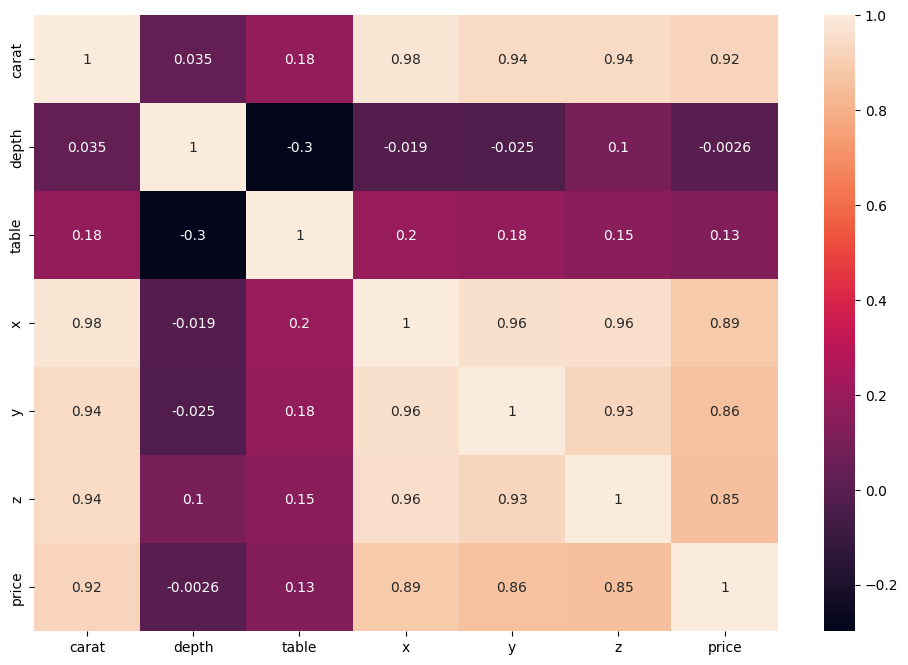

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)  # data.corr() will give a correlation matrix for features containing numerical data

## Q7 [marks: 1] Which of the following features have `missing` values?[MSQ]

Options:

A) cut

B) X

C) depth

D) price


Answer: C)


In [ ]:
X.isnull().sum() #to check null values

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
dtype: int64

# Q8 [Marks : 3] Split the dataset into training and test dataset using `train_test_split` into `70:30` ratio while keeping random_state =42. What is the shape of the training set (X_train) ? [MCQ]

Ans:

A) (18876, 10)

B) (18876, 9)

C) (19876, 9)

D) (8091, 9)

Ans: B

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape,X_test.shape

((18876, 9), (8091, 9))

# Replace missing values as instructed below in each column of data.

##Q9 [Marks2] Compute and write median of the `depth` column of X_train while ignoring the missing values. Replace all NaN values in the depth column of X_train and X_test by the mean computed from the X_train (upto two decimal). [NAT].

Ans:  61.73

In [ ]:
# Using SimpleImputer from sklearn

print("X_train mean: ", np.mean(X_train['depth']))

from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values=np.nan, strategy= 'mean')

X_train['depth'] = si.fit_transform(X_train[['depth']])

X_test['depth'] = si.transform(X_test[['depth']])


X_train mean:  61.73893786048537


In [ ]:
# # using fillna() from pandas

# depth_mean = X_train['depth'].mean()
# print(depth_mean)

# X_train.fillna(value= {"depth": depth_mean},inplace=True)

# X_test.fillna(value= {"depth": depth_mean},inplace=True)

61.73893786048537


In [ ]:
X_train.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [ ]:
X_test.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

# Following questions are on preprocessing:

* Apply OneHotEncoding of pd.get_dummies whichever preferable to you on categorical columns.

* Apply StandardScaler on the numerical columns.

Create the dataset with above preprocessing applied in any way you like


#10[Marks: 2] How many features you will get after preprocessing ?[NAT]

Ans: 26

In [ ]:
enc_X_train= pd.get_dummies(X_train, columns = ['cut','color','clarity'])
enc_X_test= pd.get_dummies(X_test, columns = ['cut','color','clarity'])

In [ ]:
enc_X_train.shape

(18876, 26)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

Transformer = [
    ('scaling', StandardScaler(), X_train.select_dtypes('number').columns)
]

ct = ColumnTransformer(Transformer, remainder='passthrough')


prep_X_train = ct.fit_transform(enc_X_train)

In [ ]:
prep_X_train.shape

(18876, 26)

In [ ]:
prep_X_test = ct.transform(enc_X_test)

#11 [Marks:5] Apply all the following regressor model on processed(encoded and scaled)  training data and answer which regressor is having highest score on processed test data with all the default setting?[NAT]

* DummyRegressor()
* LinearRegression()
* svm (SVR())
* KNN (KNeighborsRegressor())
* DecisionTreeRegressor()
* RandomForestRegressor()
* AdaBoostRegressor()
* GradientBoostingRegressor()
* XGBoostRegressor()


Ans: RandomForestRegressor()

In [ ]:
model = DummyRegressor(strategy='mean')
model.fit(prep_X_train,y_train)
model.score(prep_X_test,y_test)

-0.0003022712540052819

In [ ]:
regressors = [DummyRegressor(),LinearRegression(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),xgboost.XGBRFRegressor()]
regressors

[DummyRegressor(),
 LinearRegression(),
 SVR(),
 KNeighborsRegressor(),
 DecisionTreeRegressor(),
 RandomForestRegressor(),
 AdaBoostRegressor(),
 GradientBoostingRegressor(),
 XGBRFRegressor(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                objective='reg:squarederror', predictor=None, random_state=None,
                reg_alpha=None, ...)]

In [ ]:
for model in regressors:
  model.fit(prep_X_train,y_train)
  print(model,' Score: ', model.score(prep_X_test,y_test))

DummyRegressor()  Score:  -0.0003022712540052819
LinearRegression()  Score:  0.8872757052117065
SVR()  Score:  0.32758061844331965
KNeighborsRegressor()  Score:  0.9486792476266801
DecisionTreeRegressor()  Score:  0.9595252161955716
RandomForestRegressor()  Score:  0.9800811169097875
AdaBoostRegressor()  Score:  0.8848097509240935
GradientBoostingRegressor()  Score:  0.9668168341070638
XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n

##Q12: [Marks 3] Using `SGDRegressor(random_state=42)` as an estimator for exactly 10 iterations set warm_start=True.

Write the correct R2 score on test data  [NAT] (correct Upto 4 digits)

Ans: 0.92

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(random_state=42,max_iter=10,warm_start=True)

sgd.fit(prep_X_train, y_train)

np.round(sgd.score(prep_X_test,y_test),4)

0.9206

# Q13 [MArks:5] Use GridSearchCV for cv=5 to find the best estimator with best params for the given below estimators with parameters ?  

* Use preprocessed training set

1) SGDRegressor(warm_start=True),
  * penalty: ['l2', 'l1', 'elasticnet']
  * alpha : [0.001, 0.01, 0.1, 1]    
  
2) KNeighborsRegressor()
  * n_neighbors : [3,9,13],
  * weights : ['uniform','distance']

3) DecisionTreeRegressor()
  * reg__max_depth : [1,2,3],
  * reg__max_features : [5,6,7]


print the best_estimator and write that estimator only in answer


Ans: KNeighborsRegressor(n_neighbors=9, weights='distance')




In [ ]:
# Create a pipeline
pipe = Pipeline([("reg", SGDRegressor())])  # A default Regressor is required though training won't happen on this

# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [

    {"reg": [SGDRegressor(warm_start=True)],
     "reg__penalty": ['l2', 'l1', 'elasticnet'],
     "reg__alpha" : [0.001, 0.01, 0.1, 1]
     },

     {"reg": [KNeighborsRegressor()],
     "reg__n_neighbors" : [3,9,13],
     'reg__weights' : ['uniform','distance']
     },

    {"reg" : [DecisionTreeRegressor()],
     "reg__max_depth" : [1,2,3],
     "reg__max_features" : [5,6,7]
    }
]

gs = GridSearchCV(pipe, grid_param,cv=5 )

gs

GridSearchCV(cv=5, estimator=Pipeline(steps=[('reg', SGDRegressor())]),
             param_grid=[{'reg': [SGDRegressor(warm_start=True)],
                          'reg__alpha': [0.001, 0.01, 0.1, 1],
                          'reg__penalty': ['l2', 'l1', 'elasticnet']},
                         {'reg': [KNeighborsRegressor()],
                          'reg__n_neighbors': [3, 9, 13],
                          'reg__weights': ['uniform', 'distance']},
                         {'reg': [DecisionTreeRegressor()],
                          'reg__max_depth': [1, 2, 3],
                          'reg__max_features': [5, 6, 7]}])

In [ ]:
gs.fit(prep_X_train,y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('reg', SGDRegressor())]),
             param_grid=[{'reg': [SGDRegressor(warm_start=True)],
                          'reg__alpha': [0.001, 0.01, 0.1, 1],
                          'reg__penalty': ['l2', 'l1', 'elasticnet']},
                         {'reg': [KNeighborsRegressor(n_neighbors=9,
                                                      weights='distance')],
                          'reg__n_neighbors': [3, 9, 13],
                          'reg__weights': ['uniform', 'distance']},
                         {'reg': [DecisionTreeRegressor()],
                          'reg__max_depth': [1, 2, 3],
                          'reg__max_features': [5, 6, 7]}])

In [ ]:
pd.DataFrame(gs.cv_results_).sort_values("mean_test_score", ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg,param_reg__alpha,param_reg__penalty,param_reg__n_neighbors,param_reg__weights,param_reg__max_depth,param_reg__max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,0.006935,0.003788,0.674426,0.295884,"KNeighborsRegressor(n_neighbors=9, weights='di...",NaN,NaN,9,distance,NaN,NaN,"{'reg': KNeighborsRegressor(n_neighbors=9, wei...",0.952000,0.954193,0.950408,0.953130,0.952648,0.952476,0.001258,1
17,0.007975,0.003380,0.591151,0.235976,"KNeighborsRegressor(n_neighbors=9, weights='di...",NaN,NaN,13,distance,NaN,NaN,"{'reg': KNeighborsRegressor(n_neighbors=9, wei...",0.949417,0.951576,0.950448,0.952063,0.951563,0.951014,0.000958,2
13,0.003708,0.000276,0.320677,0.005762,"KNeighborsRegressor(n_neighbors=9, weights='di...",NaN,NaN,3,distance,NaN,NaN,"{'reg': KNeighborsRegressor(n_neighbors=9, wei...",0.950738,0.950873,0.947882,0.950531,0.952601,0.950525,0.001514,3
12,0.004701,0.000086,0.321382,0.006471,"KNeighborsRegressor(n_neighbors=9, weights='di...",NaN,NaN,3,uniform,NaN,NaN,"{'reg': KNeighborsRegressor(n_neighbors=9, wei...",0.946225,0.948748,0.943579,0.947963,0.949822,0.947268,0.002186,4
14,0.003583,0.000099,0.324088,0.003379,"KNeighborsRegressor(n_neighbors=9, weights='di...",NaN,NaN,9,uniform,NaN,NaN,"{'reg': KNeighborsRegressor(n_neighbors=9, wei...",0.945150,0.949252,0.944314,0.947791,0.946488,0.946599,0.001777,5
16,0.012283,0.004834,0.648916,0.209817,"KNeighborsRegressor(n_neighbors=9, weights='di...",NaN,NaN,13,uniform,NaN,NaN,"{'reg': KNeighborsRegressor(n_neighbors=9, wei...",0.941791,0.945179,0.944331,0.945883,0.944534,0.944344,0.001387,6
1,0.205395,0.016362,0.001521,0.000034,SGDRegressor(warm_start=True),0.001,l1,NaN,NaN,NaN,NaN,"{'reg': SGDRegressor(warm_start=True), 'reg__a...",0.910017,0.922129,0.923694,0.921204,0.920311,0.919471,0.004858,7
4,0.348753,0.065513,0.006195,0.000668,SGDRegressor(warm_start=True),0.01,l1,NaN,NaN,NaN,NaN,"{'reg': SGDRegressor(warm_start=True), 'reg__a...",0.910067,0.921969,0.923558,0.921322,0.920179,0.919419,0.004802,8
7,0.190239,0.016275,0.001521,0.000033,SGDRegressor(warm_start=True),0.1,l1,NaN,NaN,NaN,NaN,"{'reg': SGDRegressor(warm_start=True), 'reg__a...",0.910010,0.921986,0.923513,0.921349,0.920220,0.919416,0.004822,9
0,0.166050,0.011515,0.002698,0.001874,SGDRegressor(warm_start=True),0.001,l2,NaN,NaN,NaN,NaN,"{'reg': SGDRegressor(warm_start=True), 'reg__a...",0.909788,0.921920,0.923189,0.921014,0.920408,0.919264,0.004829,10


In [ ]:
print(gs.best_estimator_[0])

KNeighborsRegressor(n_neighbors=9, weights='distance')


In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

import xgboost

from sklearn.model_selection import GridSearchCV

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/MLP Case Study/cubic_zirconia1.csv")

#Q1 What is the Shape of the Datset?

Ans (26967, 10)

In [ ]:
data.shape

(26967, 10)

In [ ]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


##Q2 [Marks = 1] Break the dataset into features(`X`) and label (`y`), where the column `price` goes to `y` and the rest of the columns go to `X`. Enter the list of unique values of label in y? [NAT]
Ans : [0,1] or [1,0]

In [ ]:
X = data.drop(['price'], axis= "columns")   # works on pandas dataframe
y = data['price']
X.shape,y.shape

((26967, 9), (26967,))

## Q.3 [Marks 1] How many total number of features (excluding target variable) are there in the dataset? Price is targert variable. [NAT]

Ans:  9

In [ ]:
print('No of Columns:',X.shape[1]) #-1 is there to exclude target variable

No of Columns: 9


## Q.4 [Marks: 2] What are the unique values of feature `Cut` in the dataset? Give a list with inceasing Alphabetical order of as answer
Ans: ['Fair','Good', 'Ideal', 'Premium', 'Very Good']

In [ ]:
X["cut"].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

## Q.5 [Marks: 1] Which columns have categorical data in feature matrix?
Options:

A) ['cut','color','clarity']

B) ['cut','color', 'price']

C) ['depth',	'table']

D) ['carat'	'cut']

Ans: A

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [ ]:
numCols = list(data.select_dtypes("number").columns)
catCols = list(data.select_dtypes(exclude = "number").columns)

## Q6.[Marks: 4] Which feature pair has the highest positive correlation value.
Options:
A) x Vs Carat

B) y Vs Carat

C) z Vs x

D) table Vs depth

Ans: A

<Axes: >

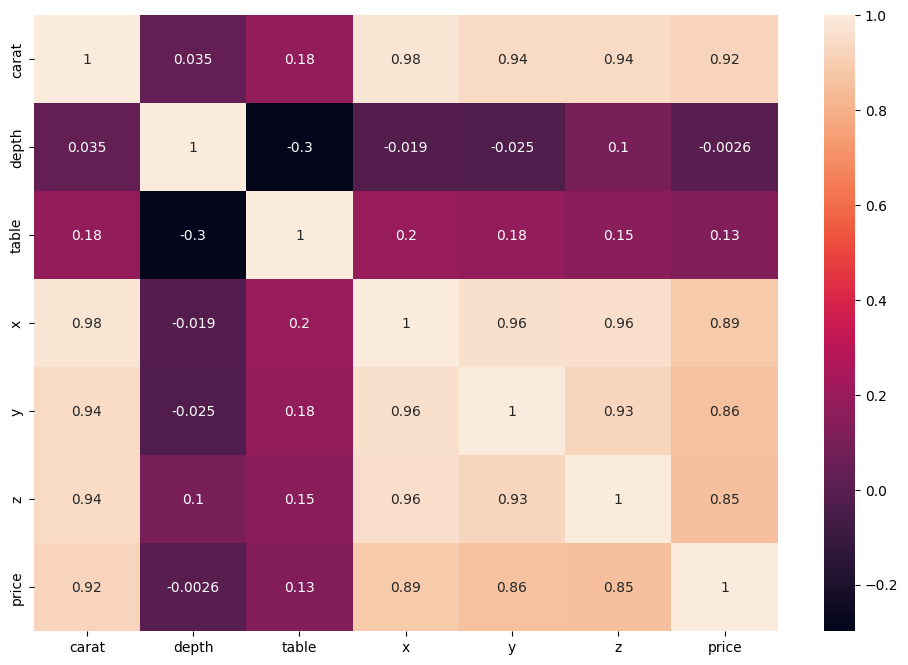

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)  # data.corr() will give a correlation matrix for features containing numerical data

## Q7 [marks: 1] Which of the following features have `missing` values?[MSQ]

Options:

A) cut

B) X

C) depth

D) price


Answer: C)


In [ ]:
X.isnull().sum() #to check null values

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
dtype: int64

# Q8 [Marks : 3] Split the dataset into training and test dataset using `train_test_split` into `70:30` ratio while keeping random_state =42. What is the shape of the training set (X_train) ? [MCQ]

Ans:

A) (18876, 10)

B) (18876, 9)

C) (19876, 9)

D) (8091, 9)

Ans: B

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape,X_test.shape

((18876, 9), (8091, 9))

# Replace missing values as instructed below in each column of data.

##Q9 [Marks2] Compute and write median of the `depth` column of X_train while ignoring the missing values. Replace all NaN values in the depth column of X_train and X_test by the mean computed from the X_train (upto two decimal). [NAT].

Ans:  61.73

In [ ]:
# Using SimpleImputer from sklearn

print("X_train mean: ", np.mean(X_train['depth']))

from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values=np.nan, strategy= 'mean')

X_train['depth'] = si.fit_transform(X_train[['depth']])

X_test['depth'] = si.transform(X_test[['depth']])


X_train mean:  61.73893786048537


In [ ]:
# # using fillna() from pandas

# depth_mean = X_train['depth'].mean()
# print(depth_mean)

# X_train.fillna(value= {"depth": depth_mean},inplace=True)

# X_test.fillna(value= {"depth": depth_mean},inplace=True)

61.73893786048537


In [ ]:
X_train.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [ ]:
X_test.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

# Following questions are on preprocessing:

* Apply OneHotEncoding of pd.get_dummies whichever preferable to you on categorical columns.

* Apply StandardScaler on the numerical columns.

Create the dataset with above preprocessing applied in any way you like


#10[Marks: 2] How many features you will get after preprocessing ?[NAT]

Ans: 26

In [ ]:
enc_X_train= pd.get_dummies(X_train, columns = ['cut','color','clarity'])
enc_X_test= pd.get_dummies(X_test, columns = ['cut','color','clarity'])

In [ ]:
enc_X_train.shape

(18876, 26)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

Transformer = [
    ('scaling', StandardScaler(), X_train.select_dtypes('number').columns)
]

ct = ColumnTransformer(Transformer, remainder='passthrough')


prep_X_train = ct.fit_transform(enc_X_train)

In [ ]:
prep_X_train.shape

(18876, 26)

In [ ]:
prep_X_test = ct.transform(enc_X_test)

#11 [Marks:5] Apply all the following regressor model on processed(encoded and scaled)  training data and answer which regressor is having highest score on processed test data with all the default setting?[NAT]

* DummyRegressor()
* LinearRegression()
* svm (SVR())
* KNN (KNeighborsRegressor())
* DecisionTreeRegressor()
* RandomForestRegressor()
* AdaBoostRegressor()
* GradientBoostingRegressor()
* XGBoostRegressor()


Ans: RandomForestRegressor()

In [ ]:
model = DummyRegressor(strategy='mean')
model.fit(prep_X_train,y_train)
model.score(prep_X_test,y_test)

-0.0003022712540052819

In [ ]:
regressors = [DummyRegressor(),LinearRegression(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),xgboost.XGBRFRegressor()]
regressors

[DummyRegressor(),
 LinearRegression(),
 SVR(),
 KNeighborsRegressor(),
 DecisionTreeRegressor(),
 RandomForestRegressor(),
 AdaBoostRegressor(),
 GradientBoostingRegressor(),
 XGBRFRegressor(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                objective='reg:squarederror', predictor=None, random_state=None,
                reg_alpha=None, ...)]

In [ ]:
for model in regressors:
  model.fit(prep_X_train,y_train)
  print(model,' Score: ', model.score(prep_X_test,y_test))

DummyRegressor()  Score:  -0.0003022712540052819
LinearRegression()  Score:  0.8872757052117065
SVR()  Score:  0.32758061844331965
KNeighborsRegressor()  Score:  0.9486792476266801
DecisionTreeRegressor()  Score:  0.9595252161955716
RandomForestRegressor()  Score:  0.9800811169097875
AdaBoostRegressor()  Score:  0.8848097509240935
GradientBoostingRegressor()  Score:  0.9668168341070638
XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n

##Q12: [Marks 3] Using `SGDRegressor(random_state=42)` as an estimator for exactly 10 iterations set warm_start=True.

Write the correct R2 score on test data  [NAT] (correct Upto 4 digits)

Ans: 0.92

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(random_state=42,max_iter=10,warm_start=True)

sgd.fit(prep_X_train, y_train)

np.round(sgd.score(prep_X_test,y_test),4)

0.9206

# Q13 [MArks:5] Use GridSearchCV for cv=5 to find the best estimator with best params for the given below estimators with parameters ?  

* Use preprocessed training set

1) SGDRegressor(warm_start=True),
  * penalty: ['l2', 'l1', 'elasticnet']
  * alpha : [0.001, 0.01, 0.1, 1]    
  
2) KNeighborsRegressor()
  * n_neighbors : [3,9,13],
  * weights : ['uniform','distance']

3) DecisionTreeRegressor()
  * reg__max_depth : [1,2,3],
  * reg__max_features : [5,6,7]


print the best_estimator and write that estimator only in answer


Ans: KNeighborsRegressor(n_neighbors=9, weights='distance')




In [ ]:
# Create a pipeline
pipe = Pipeline([("reg", SGDRegressor())])  # A default Regressor is required though training won't happen on this

# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [

    {"reg": [SGDRegressor(warm_start=True)],
     "reg__penalty": ['l2', 'l1', 'elasticnet'],
     "reg__alpha" : [0.001, 0.01, 0.1, 1]
     },

     {"reg": [KNeighborsRegressor()],
     "reg__n_neighbors" : [3,9,13],
     'reg__weights' : ['uniform','distance']
     },

    {"reg" : [DecisionTreeRegressor()],
     "reg__max_depth" : [1,2,3],
     "reg__max_features" : [5,6,7]
    }
]

gs = GridSearchCV(pipe, grid_param,cv=5 )

gs

GridSearchCV(cv=5, estimator=Pipeline(steps=[('reg', SGDRegressor())]),
             param_grid=[{'reg': [SGDRegressor(warm_start=True)],
                          'reg__alpha': [0.001, 0.01, 0.1, 1],
                          'reg__penalty': ['l2', 'l1', 'elasticnet']},
                         {'reg': [KNeighborsRegressor()],
                          'reg__n_neighbors': [3, 9, 13],
                          'reg__weights': ['uniform', 'distance']},
                         {'reg': [DecisionTreeRegressor()],
                          'reg__max_depth': [1, 2, 3],
                          'reg__max_features': [5, 6, 7]}])

In [ ]:
gs.fit(prep_X_train,y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('reg', SGDRegressor())]),
             param_grid=[{'reg': [SGDRegressor(warm_start=True)],
                          'reg__alpha': [0.001, 0.01, 0.1, 1],
                          'reg__penalty': ['l2', 'l1', 'elasticnet']},
                         {'reg': [KNeighborsRegressor(n_neighbors=9,
                                                      weights='distance')],
                          'reg__n_neighbors': [3, 9, 13],
                          'reg__weights': ['uniform', 'distance']},
                         {'reg': [DecisionTreeRegressor()],
                          'reg__max_depth': [1, 2, 3],
                          'reg__max_features': [5, 6, 7]}])

In [ ]:
pd.DataFrame(gs.cv_results_).sort_values("mean_test_score", ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg,param_reg__alpha,param_reg__penalty,param_reg__n_neighbors,param_reg__weights,param_reg__max_depth,param_reg__max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,0.006935,0.003788,0.674426,0.295884,"KNeighborsRegressor(n_neighbors=9, weights='di...",NaN,NaN,9,distance,NaN,NaN,"{'reg': KNeighborsRegressor(n_neighbors=9, wei...",0.952000,0.954193,0.950408,0.953130,0.952648,0.952476,0.001258,1
17,0.007975,0.003380,0.591151,0.235976,"KNeighborsRegressor(n_neighbors=9, weights='di...",NaN,NaN,13,distance,NaN,NaN,"{'reg': KNeighborsRegressor(n_neighbors=9, wei...",0.949417,0.951576,0.950448,0.952063,0.951563,0.951014,0.000958,2
13,0.003708,0.000276,0.320677,0.005762,"KNeighborsRegressor(n_neighbors=9, weights='di...",NaN,NaN,3,distance,NaN,NaN,"{'reg': KNeighborsRegressor(n_neighbors=9, wei...",0.950738,0.950873,0.947882,0.950531,0.952601,0.950525,0.001514,3
12,0.004701,0.000086,0.321382,0.006471,"KNeighborsRegressor(n_neighbors=9, weights='di...",NaN,NaN,3,uniform,NaN,NaN,"{'reg': KNeighborsRegressor(n_neighbors=9, wei...",0.946225,0.948748,0.943579,0.947963,0.949822,0.947268,0.002186,4
14,0.003583,0.000099,0.324088,0.003379,"KNeighborsRegressor(n_neighbors=9, weights='di...",NaN,NaN,9,uniform,NaN,NaN,"{'reg': KNeighborsRegressor(n_neighbors=9, wei...",0.945150,0.949252,0.944314,0.947791,0.946488,0.946599,0.001777,5
16,0.012283,0.004834,0.648916,0.209817,"KNeighborsRegressor(n_neighbors=9, weights='di...",NaN,NaN,13,uniform,NaN,NaN,"{'reg': KNeighborsRegressor(n_neighbors=9, wei...",0.941791,0.945179,0.944331,0.945883,0.944534,0.944344,0.001387,6
1,0.205395,0.016362,0.001521,0.000034,SGDRegressor(warm_start=True),0.001,l1,NaN,NaN,NaN,NaN,"{'reg': SGDRegressor(warm_start=True), 'reg__a...",0.910017,0.922129,0.923694,0.921204,0.920311,0.919471,0.004858,7
4,0.348753,0.065513,0.006195,0.000668,SGDRegressor(warm_start=True),0.01,l1,NaN,NaN,NaN,NaN,"{'reg': SGDRegressor(warm_start=True), 'reg__a...",0.910067,0.921969,0.923558,0.921322,0.920179,0.919419,0.004802,8
7,0.190239,0.016275,0.001521,0.000033,SGDRegressor(warm_start=True),0.1,l1,NaN,NaN,NaN,NaN,"{'reg': SGDRegressor(warm_start=True), 'reg__a...",0.910010,0.921986,0.923513,0.921349,0.920220,0.919416,0.004822,9
0,0.166050,0.011515,0.002698,0.001874,SGDRegressor(warm_start=True),0.001,l2,NaN,NaN,NaN,NaN,"{'reg': SGDRegressor(warm_start=True), 'reg__a...",0.909788,0.921920,0.923189,0.921014,0.920408,0.919264,0.004829,10


In [ ]:
print(gs.best_estimator_[0])

KNeighborsRegressor(n_neighbors=9, weights='distance')
